In [108]:
import sys
import pandas
import numpy
import sklearn
import keras

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# import the uci pima indians diabetes dataset
names = ['n_pregnant', 'glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)',
        'BMI', 'pedigree_function', 'age', 'class']
df = pd.read_csv('diabetes.csv', names = names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
n_pregnant                 769 non-null object
glucose_concentration      769 non-null object
blood_pressuer (mm Hg)     769 non-null object
skin_thickness (mm)        769 non-null object
serum_insulin (mu U/ml)    769 non-null object
BMI                        769 non-null object
pedigree_function          769 non-null object
age                        769 non-null object
class                      769 non-null object
dtypes: object(9)
memory usage: 54.1+ KB


In [109]:
df.head()

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [110]:
df.columns = df.iloc[0].values
df.drop(0,inplace=True)
df.describe()

In [112]:
df = df.reset_index()
df.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [113]:
df.drop('index',axis=1,inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
for x in df.columns.tolist():
    df[x] = pd.to_numeric(df[x])

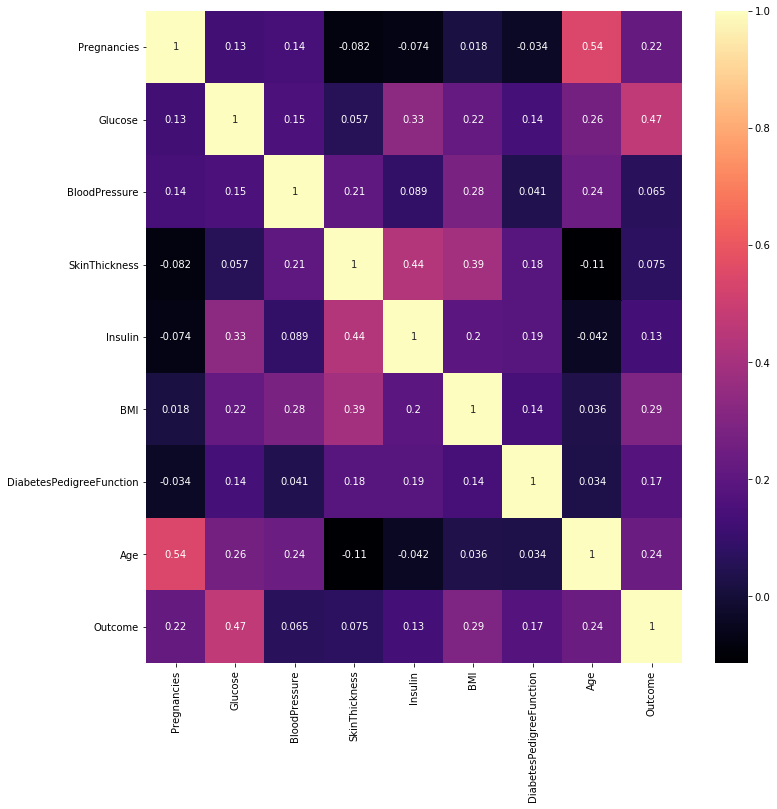

In [115]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='magma')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [117]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [118]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


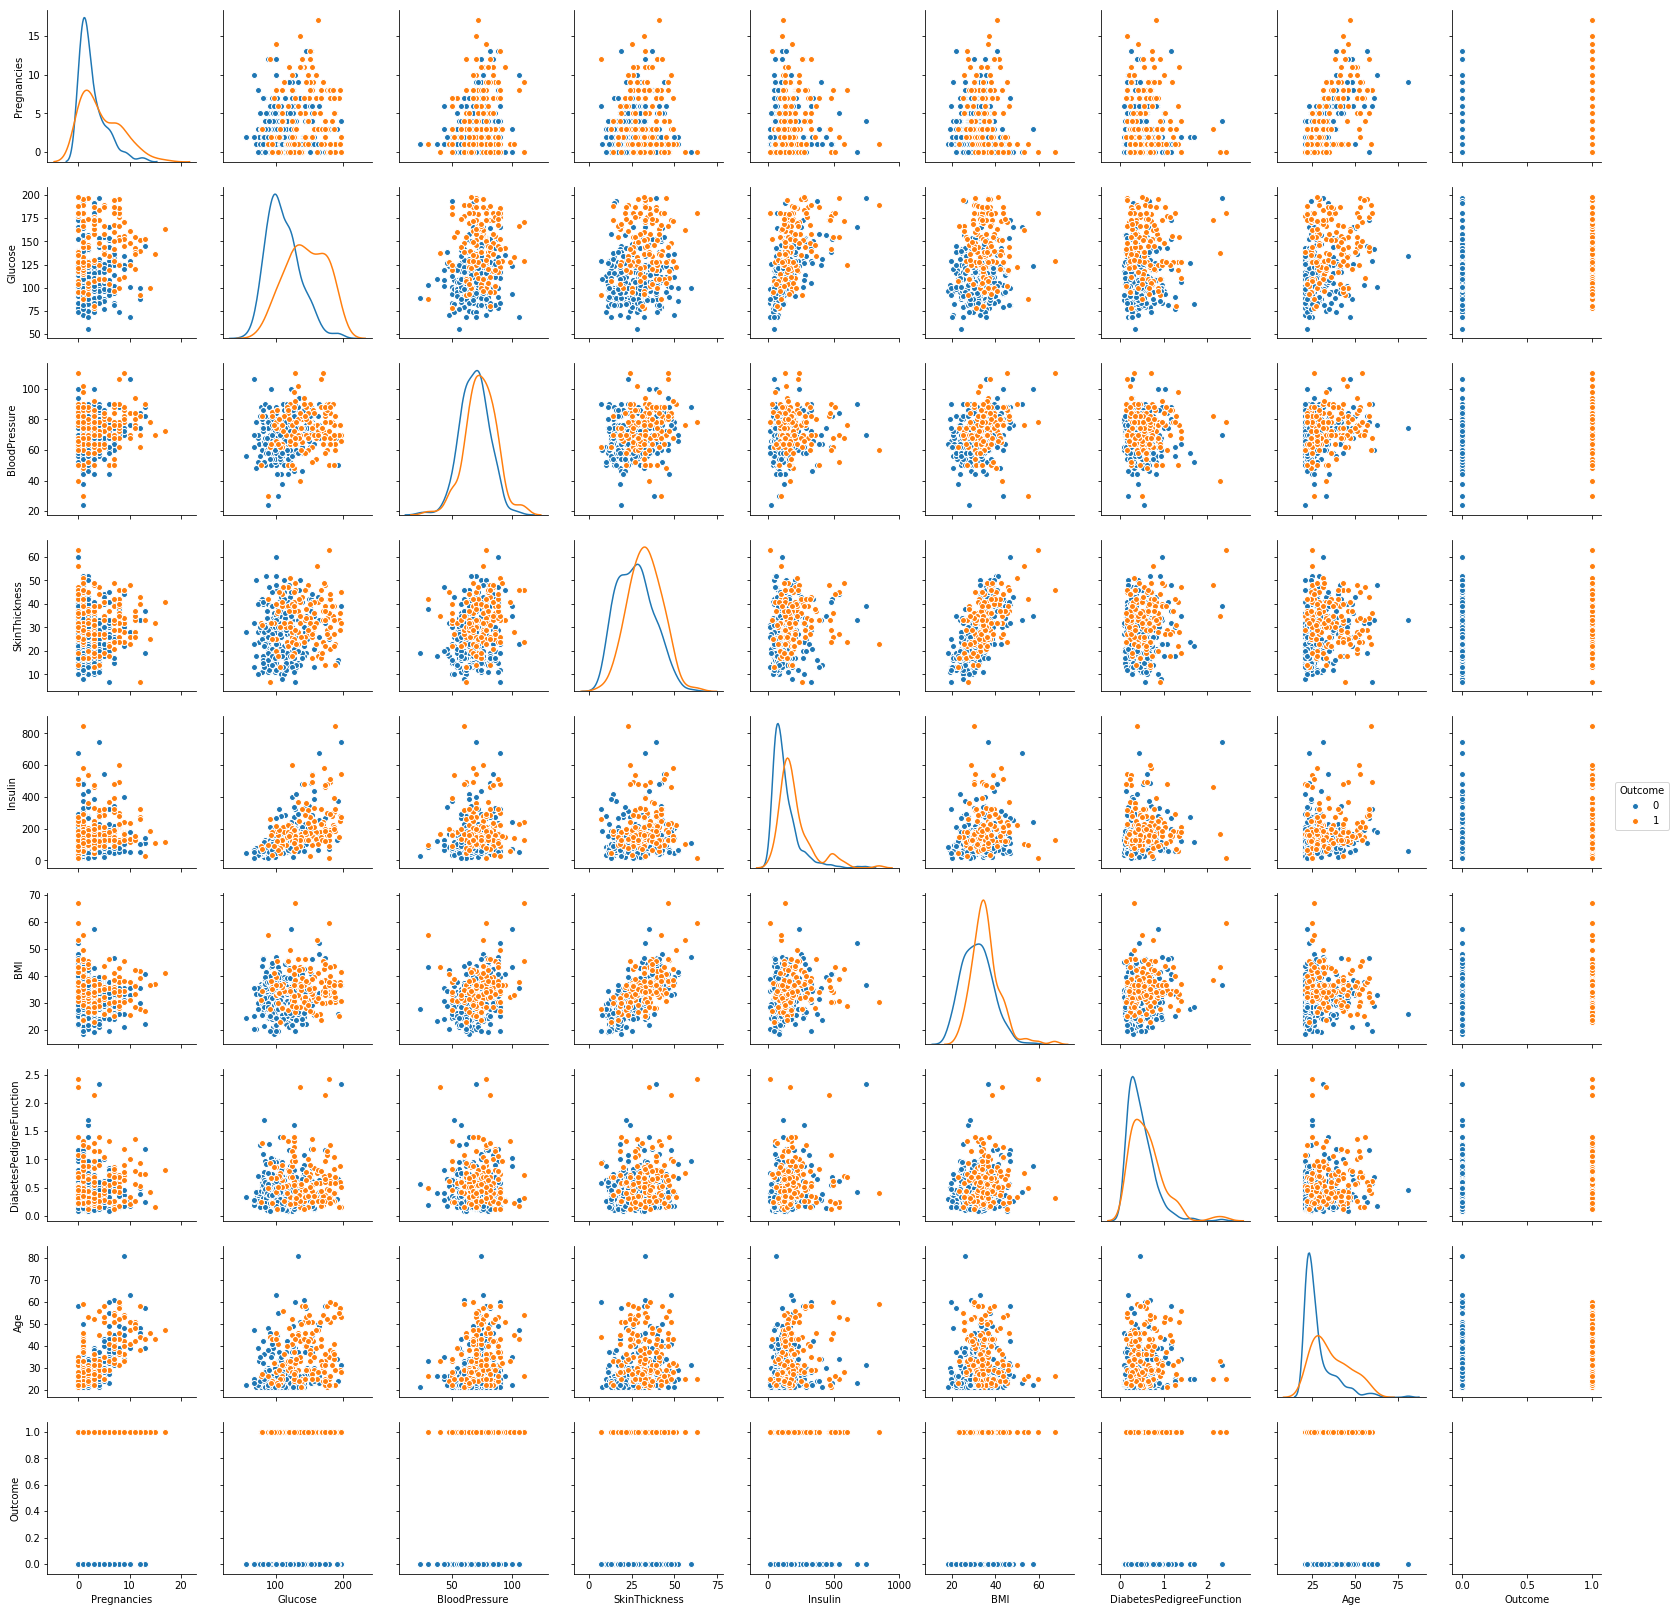

In [119]:
df.dropna(inplace=True)

sns.pairplot(df,hue='Outcome',diag_kind='kde')

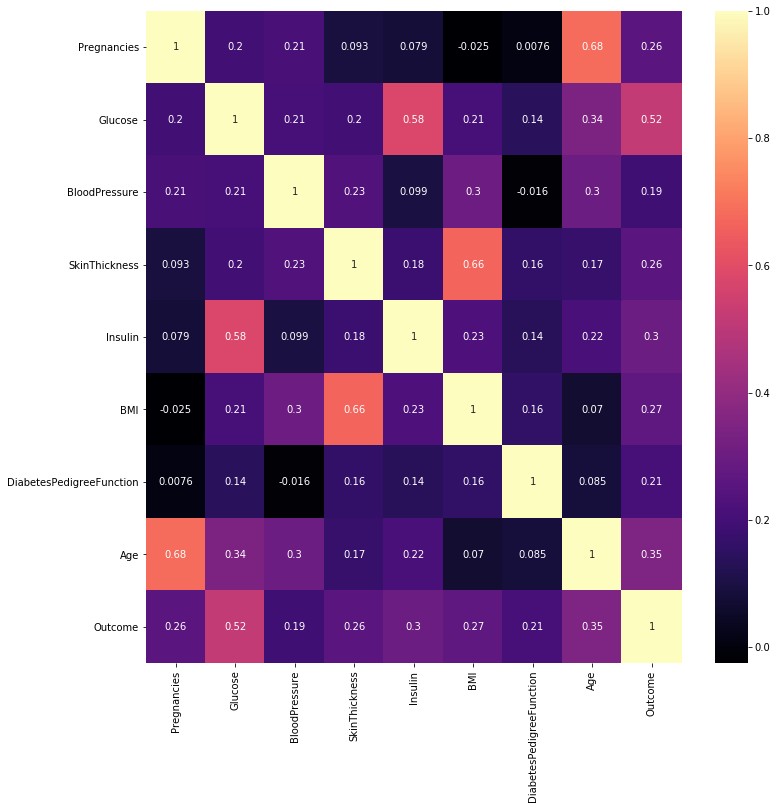

In [120]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='magma')

In [121]:
df.groupby('Outcome').size()

Outcome
0    262
1    130
dtype: int64

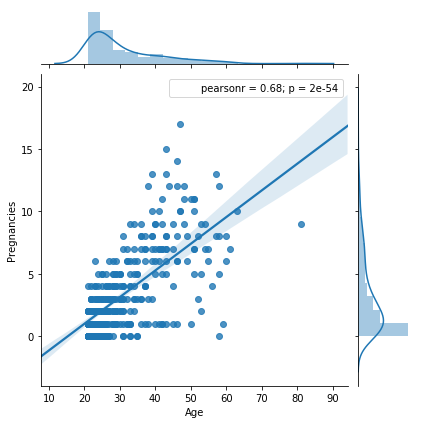

In [122]:
sns.jointplot(df.Age,df.Pregnancies,kind='reg')

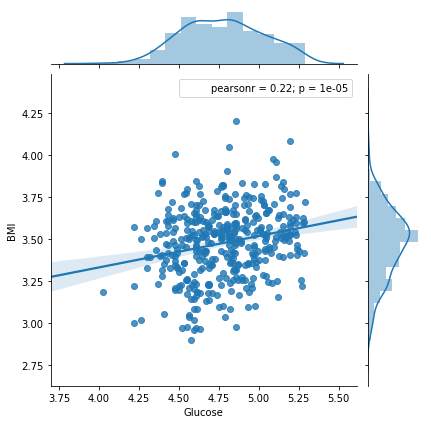

In [124]:
sns.jointplot(np.log(df.Glucose),np.log(df.BMI),kind='reg')

In [127]:
for name,group in df.groupby('Pregnancies'):
    print(name)
    print(pd.DataFrame(group))

0
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0    137.0           40.0           35.0    168.0  43.1   
16             0    118.0           84.0           47.0    230.0  45.8   
57             0    100.0           88.0           60.0    110.0  46.8   
59             0    105.0           64.0           41.0    142.0  41.5   
109            0     95.0           85.0           25.0     36.0  37.4   
120            0    162.0           76.0           56.0    100.0  53.2   
136            0    100.0           70.0           26.0     50.0  30.8   
137            0     93.0           60.0           25.0     92.0  28.7   
162            0    114.0           80.0           34.0    285.0  44.2   
177            0    129.0          110.0           46.0    130.0  67.1   
181            0    119.0           64.0           18.0     92.0  34.9   
213            0    140.0           65.0           26.0    130.0  42.6   
220            0    177.0           

In [107]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [161]:
dataset = df.values
dataset.shape

(392, 8)

In [162]:
X = dataset[:,:7]
y = dataset[:,7]
X.shape,y.shape

((392, 7), (392,))

In [163]:
X_standardized = scaler.fit_transform(X)

data = pd.DataFrame(X_standardized)
data.describe()

,0,1,2,3,4,5,6
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-4.021726e-17,3.129583e-17,1.042250e-16,6.485742e-17,1.543550e-16,3.880116e-17,1.028089e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


In [164]:
from sklearn.model_selection import GridSearchCV,KFold

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [166]:
X_standardized.shape,y.shape

(392, 7)

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_standardized,y)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

(294, 7)
(98, 7)
(294,)
(98,)


In [169]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test,y_pred=preds)

array([[50, 16],
       [14, 18]], dtype=int64)

In [170]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=10)

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

confusion_matrix(y_true=y_test,y_pred=preds)

array([[54, 12],
       [12, 20]], dtype=int64)

In [171]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

confusion_matrix(y_true=y_test,y_pred=preds)

array([[51, 15],
       [13, 19]], dtype=int64)

In [143]:
# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=10, epochs=10 ........................................


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Error when checking input: expected dense_757_input to have shape (8,) but got array with shape (7,)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learn_rate=0.001, score=0.6836734669549125, total=  24.2s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learn_rate=0.001, score=0.7755102028652113, total=  23.9s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   48.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learn_rate=0.001, score=0.8265306110284767, total=  23.5s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV]  dropout_rate=0.0, learn_rate=0.01, score=0.7244897886198394, total=  26.2s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV]  dropout_rate=0.0, learn_rate=0.01, score=0.7857142893635497, total=  25.6s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min remaining:    0.0s


[CV]  dropout_rate=0.0, learn_rate=0.01, score=0.6938775510204082, total=  24.0s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.5min remaining:    0.0s


[CV]  dropout_rate=0.0, learn_rate=0.1, score=0.6326530441945913, total=  24.2s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.9min remaining:    0.0s


[CV]  dropout_rate=0.0, learn_rate=0.1, score=0.7653061309639289, total=  25.2s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.3min remaining:    0.0s


[CV]  dropout_rate=0.0, learn_rate=0.1, score=0.7040816411680105, total=  24.8s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.7min remaining:    0.0s


[CV]  dropout_rate=0.1, learn_rate=0.001, score=0.6836734669549125, total=  26.0s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV]  dropout_rate=0.1, learn_rate=0.001, score=0.7653061273146649, total=  27.9s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV]  dropout_rate=0.1, learn_rate=0.001, score=0.7959183673469388, total=  28.1s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV]  dropout_rate=0.1, learn_rate=0.01, score=0.6938775546696722, total=  22.5s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV]  dropout_rate=0.1, learn_rate=0.01, score=0.7551020347342199, total=  28.1s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV]  dropout_rate=0.1, learn_rate=0.01, score=0.6938775425054589, total=  26.1s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................
[CV]  dropout_rate=0.1, learn_rate=0.1, score=0.7142857191513996, total=  31.5s
[CV] 

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 11.4min finished


Best: 0.7619047602828668, using {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7619047602828668 (0.05910934474406944) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.734693876334599 (0.038180179691776756) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7006802721088435 (0.05420877752397571) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.7482993205388387 (0.04737547201901486) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7142857106364503 (0.028861499552641192) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.7244897934855247 (0.0546339473448241) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.7585033989277016 (0.031542920839727005) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7278911515968998 (0.031542918609835616) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.7074829887370674 (0.031542913975159535) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


In [60]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# define the grid search parameters
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] neuron1=4, neuron2=2 ............................................


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... neuron1=4, neuron2=2, score=0.7244897971347887, total=  23.5s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.6s remaining:    0.0s


[CV] ... neuron1=4, neuron2=2, score=0.7755102028652113, total=  23.4s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   47.1s remaining:    0.0s


[CV] ... neuron1=4, neuron2=2, score=0.8061224514124344, total=  23.6s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV] ... neuron1=4, neuron2=4, score=0.7346938812002843, total=  23.5s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV] ... neuron1=4, neuron2=4, score=0.7755102028652113, total=  23.9s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min remaining:    0.0s


[CV] ... neuron1=4, neuron2=4, score=0.7959183649140962, total=  24.0s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.4min remaining:    0.0s


[CV] ... neuron1=4, neuron2=8, score=0.7346938812002843, total=  24.1s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.8min remaining:    0.0s


[CV] ... neuron1=4, neuron2=8, score=0.7755102028652113, total=  24.0s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.2min remaining:    0.0s


[CV] ... neuron1=4, neuron2=8, score=0.7959183649140962, total=  24.1s
[CV] neuron1=8, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.6min remaining:    0.0s


[CV] ... neuron1=8, neuron2=2, score=0.7448979567508308, total=  24.2s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ... neuron1=8, neuron2=2, score=0.7755102028652113, total=  24.6s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ... neuron1=8, neuron2=2, score=0.7959183649140962, total=  24.5s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ... neuron1=8, neuron2=4, score=0.7346938726853351, total=  24.6s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ... neuron1=8, neuron2=4, score=0.7755102028652113, total=  24.6s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ... neuron1=8, neuron2=4, score=0.7959183649140962, total=  24.9s
[CV] neuron1=8, neuron2=8 ............................................
[CV] ... neuron1=8, neuron2=8, score=0.7346938726853351, total=  24.8s
[CV] neuron1=8, neuron2=8 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 11.2min finished


Best: 0.7721088415100461, using {'neuron1': 8, 'neuron2': 2}
0.7687074838041448 (0.03367175177178696) with: {'neuron1': 4, 'neuron2': 2}
0.7687074829931972 (0.025453449009888933) with: {'neuron1': 4, 'neuron2': 4}
0.7687074829931972 (0.025453449009888933) with: {'neuron1': 4, 'neuron2': 8}
0.7721088415100461 (0.02096739463369825) with: {'neuron1': 8, 'neuron2': 2}
0.7687074801548809 (0.02545345280274877) with: {'neuron1': 8, 'neuron2': 4}
0.7687074801548809 (0.02545345280274877) with: {'neuron1': 8, 'neuron2': 8}
0.765306121638032 (0.022043338899734356) with: {'neuron1': 16, 'neuron2': 2}
0.7687074801548809 (0.02545345280274877) with: {'neuron1': 16, 'neuron2': 4}
0.765306121638032 (0.022043338899734356) with: {'neuron1': 16, 'neuron2': 8}


In [63]:
y_pred = grid.predict(X_test)

y_pred.shape

In [65]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        76
         1.0       0.68      0.68      0.68        22

   micro avg       0.86      0.86      0.86        98
   macro avg       0.79      0.79      0.79        98
weighted avg       0.86      0.86      0.86        98



In [66]:
confusion_matrix(y_test,y_pred)

array([[69,  7],
       [ 7, 15]], dtype=int64)

In [67]:
confusion_matrix(y_train,grid.predict(X_train))

array([[160,  26],
       [ 44,  64]], dtype=int64)

In [69]:
df.describe()

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1]:
##to be continued